Loading the dataset:

In [52]:
import pandas as pd

data = pd.read_csv("spam_ham_dataset3.csv")
data.head(10)  # Display the first 10 rows of the dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


About Dataset:

In [53]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


Cleaning Dataset:

In [ ]:
# checking null value 
data=data.drop(columns=["Unnamed: 0"])
print(data.isnull().sum())
import re
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower())) #text cleaning


label        0
text         0
label_num    0
dtype: int64


Data Visualisation:

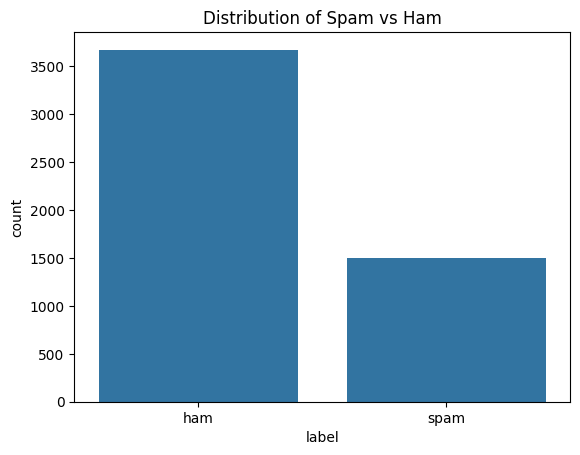

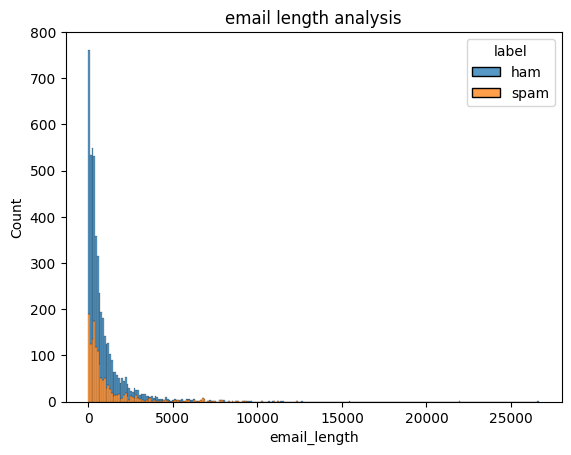

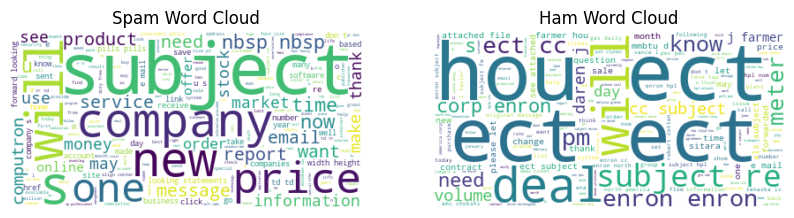

              email_length  label_num
email_length      1.000000   0.092705
label_num         0.092705   1.000000


In [23]:
# Distribution of Spam vs Ham
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label',data=data)
plt.title("Distribution of Spam vs Ham")
plt.show()

# Email Length Analysis
data["email_length"]=data["text"].apply(len) #create a column name "email_length in data"
sns.histplot(data=data,x="email_length",hue="label",multiple="stack")
plt.title("email length analysis")
plt.show()

# COMMON WORDS IN HAM AND SPAM

from wordcloud import WordCloud

spam_text = " ".join(email for email in data[data['label'] == 'spam']['text'])
ham_text = " ".join(email for email in data[data['label'] == 'ham']['text'])

spam_wordcloud = WordCloud(background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(background_color='white').generate(ham_text)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()

# CORRELATION BETWEEN EMAIL_LENGTH AND LABEL_NUM
correlation = data[['email_length', 'label_num']].corr()
print(correlation)


MODELS :

In [36]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
# Encode target labels using LabelEncoder
le = LabelEncoder()
data['label_num'] = le.fit_transform(data['label'])

# feature extraction
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(data['text'])

scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(data[['label_num']])
X_combined = hstack((X_text, X_numeric))

y = data['label_num']

# splitting the data into train test 
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

MODEL 1 : Naive Bayes

In [29]:
print("\n--- Naive Bayes ---\n")
nb_model = MultinomialNB()
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0]}
nb_grid = GridSearchCV(nb_model, nb_param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
nb_grid.fit(X_train, y_train)
y_pred_nb = nb_grid.best_estimator_.predict(X_test)
print("Best Params:", nb_grid.best_params_,"\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


--- Naive Bayes ---

Best Params: {'alpha': 1.0} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035

Confusion Matrix:
 [[742   0]
 [  0 293]]


MODEL 2 : Logistic Regression

In [ ]:
print("\n--- Logistic Regression ---\n")
lr_model = LogisticRegression(max_iter=1000)
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}
lr_grid = GridSearchCV(lr_model, lr_param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.best_estimator_.predict(X_test)
print("Best Params:", lr_grid.best_params_)
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

MODEL 3 : Random Forest

In [31]:
print("\n----- Random Forest  -----\n ")
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf_model, rf_param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
print("Best Params:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


----- Random Forest  -----
 
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       742
           1       1.00      0.98      0.99       293

    accuracy                           1.00      1035
   macro avg       1.00      0.99      0.99      1035
weighted avg       1.00      1.00      1.00      1035

Confusion Matrix:
 [[742   0]
 [  5 288]]


MODEL 4 : Support Vector Machine (SVM)

In [32]:
print("\n--- Support Vector Machine (SVM) --- \n")
svm_model = SVC(probability=True)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm_model, svm_param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.best_estimator_.predict(X_test)
print("Best Params:", svm_grid.best_params_)
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


--- Support Vector Machine (SVM) --- 

Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035

Confusion Matrix:
 [[742   0]
 [  0 293]]


In [ ]:
print(data['label'].value_counts()) # showing moderate class imbalance 


label
ham     3672
spam    1499
Name: count, dtype: int64


In [ ]:
 '''
    after doing oversampling to balance the imbalance data using SMOTE, output get little bit
    less good than without oversampling

    output after oversampling (using smote):
    --- Naive Bayes ---

Best Params: {'alpha': 0.1} 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       742
           1       0.96      1.00      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035

Confusion Matrix:
 [[729  13]
 [  0 293]]


--- Logistic Regression ---

Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035

Confusion Matrix:
 [[742   0]
 [  0 293]]


----- Random Forest  -----

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.97      1.00      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

Confusion Matrix:
 [[734   8]
 [  1 292]]


--- Support Vector Machine (SVM) --- 

Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       742
           1       1.00      1.00      1.00       293

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035

Confusion Matrix:
 [[742   0]
 [  0 293]]

 '''